# scplotter to work with 10x Xenium data prepared by Giotto

See: <https://drieslab.github.io/giotto_workshop_2024/xenium-1.html>

Go back to scplotter documentation: <https://pwwang.github.io/scplotter/>

In [1]:
library(Giotto)

# Ensure Giotto can access a python env
genv_exists <- suppressMessages(checkGiottoEnvironment())
print(genv_exists)

python_path <- file.path(Sys.getenv("HOME"), "miniconda3", "envs", "giotto_env", "bin", "python")
Sys.setenv(RETICULATE_PYTHON = python_path)

invisible(capture.output(suppressMessages(set_giotto_python_path(python_path = python_path))))

# library(scplotter)
devtools::load_all()

Loading required package: GiottoClass



Newer devel version of GiottoClass on GitHub: 0.4.8

Giotto Suite 4.2.1



[1] TRUE


ℹ Loading scplotter


In [2]:
instrs <- createGiottoInstructions(
    save_dir = "data/Xenium_giotto_workshop_results",
    save_plot = FALSE,
    show_plot = TRUE,
    return_plot = TRUE,
    python_path = python_path
)

feat_types <- c(
    "rna",
    "UnassignedCodeword",
    "NegControlCodeword",
    "NegControlProbe"
)
split_keywords = list(
    c("NegControlProbe"),
    c("UnassignedCodeword"),
    c("NegControlCodeword)"
))
data_path <- "data/Xenium_Giotto_workshop"

# 4. Create the object
# If error, remove <data_path>/morphology_focus/morphology_focus_0000.xml
g <- createGiottoXeniumObject(
    xenium_dir = data_path,
    qv_threshold = 20, # qv of 20 is the default and also what 10x uses
    feat_type = feat_types,
    split_keyword = split_keywords,
    # * if aligned images already converted to .tif, they could be added as named list
    # * instead, see next section
    # load_aligned_images = list(
    #     post_he = c(
    #         "path/to/...he_image.tif",
    #         "path/to/...he_imagealignment.csv"
    #     ),
    #     CD20 = ...,
    #     HER2 = ...,
    #     DAPI = ...
    # ),
    instructions = instrs
)

g <- addSpatialCentroidLocations(g, poly_info = "cell")
g <- addSpatialCentroidLocations(g, poly_info = "nucleus")

force(g)

python already initialized in this session
 active environment : 'giotto_env'
 python version : 3.10



Loading transcript level info...

QV cutoff: 20.000000
 Feature points removed: 80635, out of 559826

Loading boundary info 'cell'

Warning message in `[.data.table`(spatial_info, , `:=`((part_col), NULL)):
“Tried to assign NULL to column 'label_id', but this column does not exist to remove”
Loading boundary info 'nucleus'

Warning message in `[.data.table`(spatial_info, , `:=`((part_col), NULL)):
“Tried to assign NULL to column 'label_id', but this column does not exist to remove”
Loading feature metadata...

loading image as 'dapi'

loading image as 'bound1'

loading image as 'bound2'

loading image as 'bound3'

calculating centroids

done

Start centroid calculation for polygon information
 layer: cell

> spatial locations for polygon information layer " cell " and name " raw "
 already exists and will be replaced

Start centroid calculation for polygon information
 layer: nucleus

> spatial locations for polygon information layer " nucleus " and name " raw "
 already exists and wil

An object of class giotto 
>Active spat_unit:  cell 
>Active feat_type:  rna 
dimensions    : 384, 7655 (features, cells)
[SUBCELLULAR INFO]
polygons      : cell nucleus 
features      : rna UnassignedCodeword NegControlCodeword NegControlProbe 
[AGGREGATE INFO]
spatial locations ----------------
  [cell] raw
  [nucleus] raw
attached images ------------------
images      : 4 items...


Use objHistory() to see steps and params used

In [3]:
# Simple Visualization
options(repr.plot.width = 8, repr.plot.height = 6)

SpatDimPlot(
    g,
    image = "black",
    # put shapes at last
    layers = c("image", "points", "shapes"),
    features = head(featIDs(g)),
    shapes_border_color = "cyan",
    shapes_border_size = 0.1,
    shapes_fill_by = "black"
)


In [4]:
x <- importXenium(data_path)
x$filetype$expression <- "mtx" # change to mtx instead of .h5 which is not in the mini dataset

ex <- x$load_expression()
featType(ex)

featType(ex[[2]]) <- c("NegControlProbe")
featType(ex[[3]]) <- c("NegControlCodeword")
featType(ex[[4]]) <- c("UnassignedCodeword")
force(ex)

g2 <- g
# append the expression info
g2 <- setGiotto(g2, ex)

# load cell metadata
cx <- x$load_cellmeta()
g2 <- setGiotto(g2, cx)

force(g2)

Loading 10x pre-aggregated expression...



[1] "rna"                "NegControlProbe"    "NegControlCodeword"
[4] "UnassignedCodeword"

[[1]]
An object of class exprObj : "raw"
spat_unit : "cell"
feat_type : "rna"
provenance: cell 

contains:
377 x 7655 sparse Matrix of class "dgTMatrix"
                                       
ABCC11 . . . . . . . . . . . . . ......
ACE2   . . . . . . . . . . . . . ......
ACKR1  . . . . . . . . . . . . . ......

 ........suppressing 7642 columns and 371 rows 
                                      
VSIG4 . . . . . . . . . . . . . ......
VWA5A . . . . . 2 . 1 . 1 . . . ......
VWF   . . . 1 1 . . . . . . . . ......

 First four colnames:
 caijolig-1 caikcgdg-1 cailegle-1
 cailnfaf-1 

[[2]]
An object of class exprObj : "raw"
spat_unit : "cell"
feat_type : "NegControlProbe"
provenance: cell 

contains:
13 x 7655 sparse Matrix of class "dgTMatrix"
                                                      
NegControlProbe_00042 . . . . . . . . . . . . . ......
NegControlProbe_00035 . . . . . . . . . . . . . ......
NegControlProbe_00034 . . . . . . . . . . . . . ......

 ........suppressing 7642 

Setting expression [cell][rna] raw

Setting expression [cell][NegControlProbe] raw

Setting expression [cell][NegControlCodeword] raw

Setting expression [cell][UnassignedCodeword] raw

Loading 10X cell metadata...

Warning message:
“Potentially unsafe or invalid elements have been discarded from R metadata.
ℹ Type: "externalptr"
→ If you trust the source, you can set `options(arrow.unsafe_metadata = TRUE)` to preserve them.”
Warning message:
“Potentially unsafe or invalid elements have been discarded from R metadata.
ℹ Type: "externalptr"
→ If you trust the source, you can set `options(arrow.unsafe_metadata = TRUE)` to preserve them.”
Warning message:
“Potentially unsafe or invalid elements have been discarded from R metadata.
ℹ Type: "externalptr"
→ If you trust the source, you can set `options(arrow.unsafe_metadata = TRUE)` to preserve them.”
Warning message:
“Potentially unsafe or invalid elements have been discarded from R metadata.
ℹ Type: "externalptr"
→ If you trust the source,

An object of class giotto 
>Active spat_unit:  cell 
>Active feat_type:  rna 
dimensions    : 377, 7655 (features, cells)
[SUBCELLULAR INFO]
polygons      : cell nucleus 
features      : rna UnassignedCodeword NegControlCodeword NegControlProbe 
[AGGREGATE INFO]
expression -----------------------
  [cell][rna] raw
  [cell][NegControlProbe] raw
  [cell][NegControlCodeword] raw
  [cell][UnassignedCodeword] raw
spatial locations ----------------
  [cell] raw
  [nucleus] raw
attached images ------------------
images      : 4 items...


Use objHistory() to see steps and params used

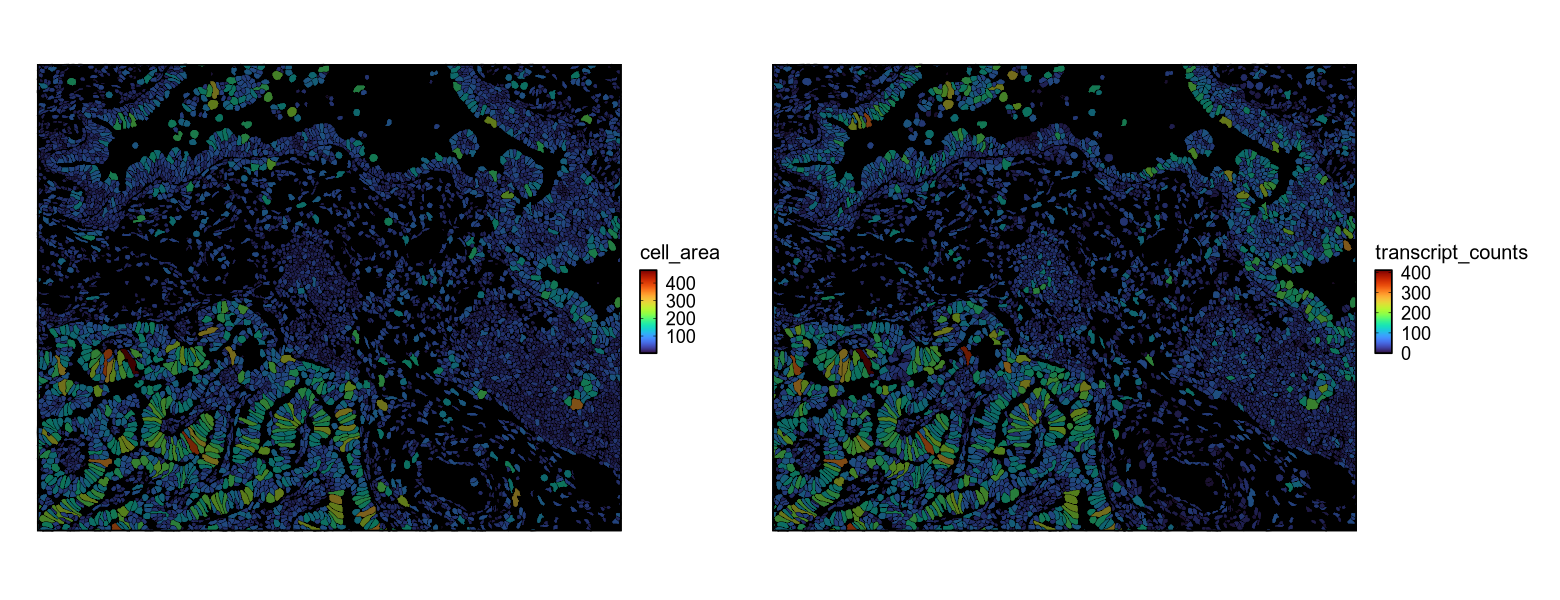

In [5]:
options(repr.plot.width = 13, repr.plot.height = 5)
p1 <- SpatFeaturePlot(
    g2,
    image = "black",
    points = FALSE,  # don't show points
    shapes_border_size = 0.1,
    shapes_fill_by = "cell_area"
)
p2 <- SpatFeaturePlot(
    g2,
    image = "black",
    points = FALSE,  # don't show points
    shapes_border_size = 0.1,
    shapes_fill_by = "transcript_counts"
)
p1 + p2

In [6]:
img_paths <- c(
    sprintf("data/Xenium_Giotto_workshop/morphology_focus/morphology_focus_%04d.tif", 0:3),
    "data/Xenium_Giotto_workshop/he_mini.tif"
)

img_list <- createGiottoLargeImageList(
    img_paths,
    # naming is based on the channel metadata above
    names = c("DAPI", "18S", "ATP1A1/CD45/E-Cadherin", "alphaSMA/Vimentin", "HE"),
    use_rast_ext = TRUE,
    verbose = FALSE
)

# make some images brighter
img_list[[1]]@max_window <- 5000
img_list[[2]]@max_window <- 5000
img_list[[3]]@max_window <- 5000

# append images to gobject
g <- setGiotto(g, img_list)

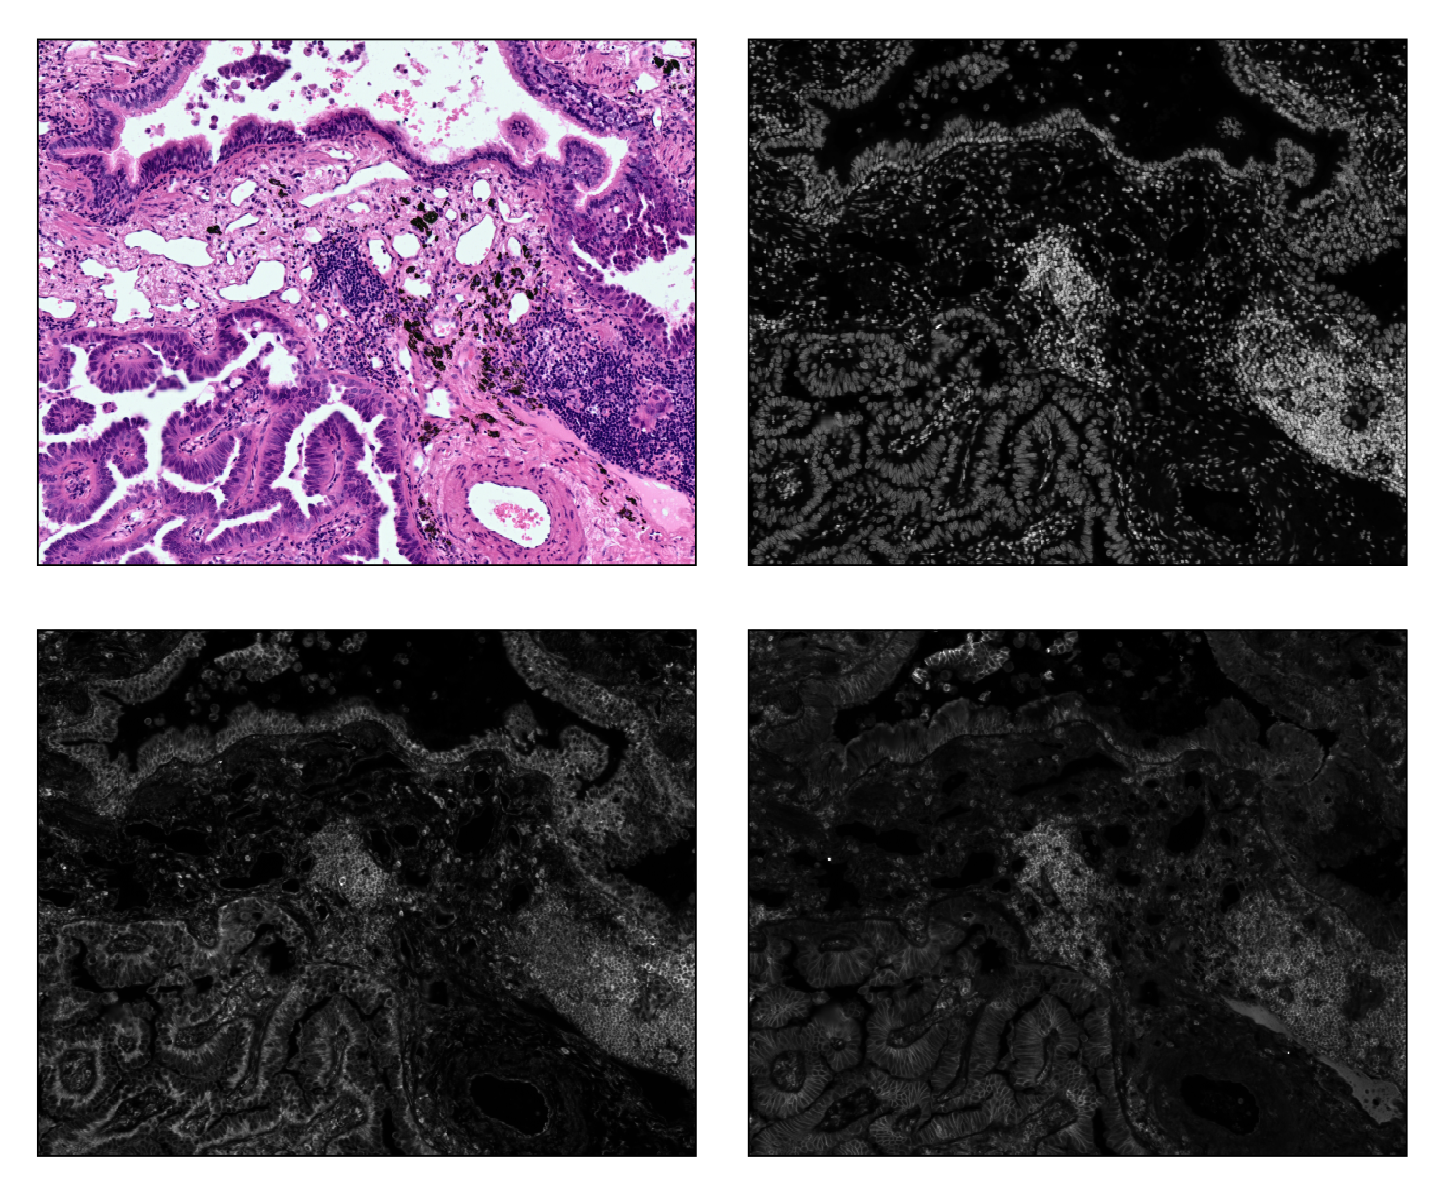

In [7]:
options(repr.plot.width = 12, repr.plot.height = 10)
p1 <- SpatDimPlot(g, image = "HE", points = FALSE)
p2 <- SpatDimPlot(g, image = "DAPI", shapes_feat_type = "nucleus", points = FALSE)
p3 <- SpatDimPlot(g, image = "18S", points = FALSE)
p4 <- SpatDimPlot(g, image = "ATP1A1/CD45/E-Cadherin", shapes_feat_type = "nucleus",
    points = FALSE)

(p1 + p2) / (p3 + p4)

In [8]:
g <- addStatistics(g2, expression_values = "raw")
g <- normalizeGiotto(g)
g <- filterGiotto(g,
    expression_threshold = 1,
    feat_det_in_min_cells = 1,
    min_det_feats_per_cell = 5
)
# overwrite original results with those for normalized values
g <- addStatistics(g)

calculating statistics for "raw" expression

Warning message in .libzero_warn(libsizes = libsizes):
“Total library size or counts for individual spat
 units are 0.
 This will likely result in normalization problems.
 filter (filterGiotto) or impute (imputeGiotto) spatial
 units.”
first scale feats and then cells

Setting expression [cell][rna] normalized

Setting expression [cell][rna] scaled

completed 1: preparation

completed 2: subset expression data

completed 3: subset spatial locations

completed 4: subset cell metadata

completed 5: subset feature metadata

completed 6: subset spatial network(s)

completed 7: subsetted dimension reductions

completed 8: subsetted nearest network(s)

completed 9: subsetted spatial enrichment results

for cell

--> cell found back in polygon layer: cell

for nucleus

completed 10: subsetted spatial information data

subset feature info: rna

completed 11: subsetted spatial feature data




Feature type:  rna 
Number of cells removed:  69  out of  7655 
Number of feats removed:  0  out of  377 


calculating statistics for "normalized" expression

feat statistics has already been applied once; overwriting

cells statistics has already been applied once; overwriting


These column names were already used: area
 and will be overwritten



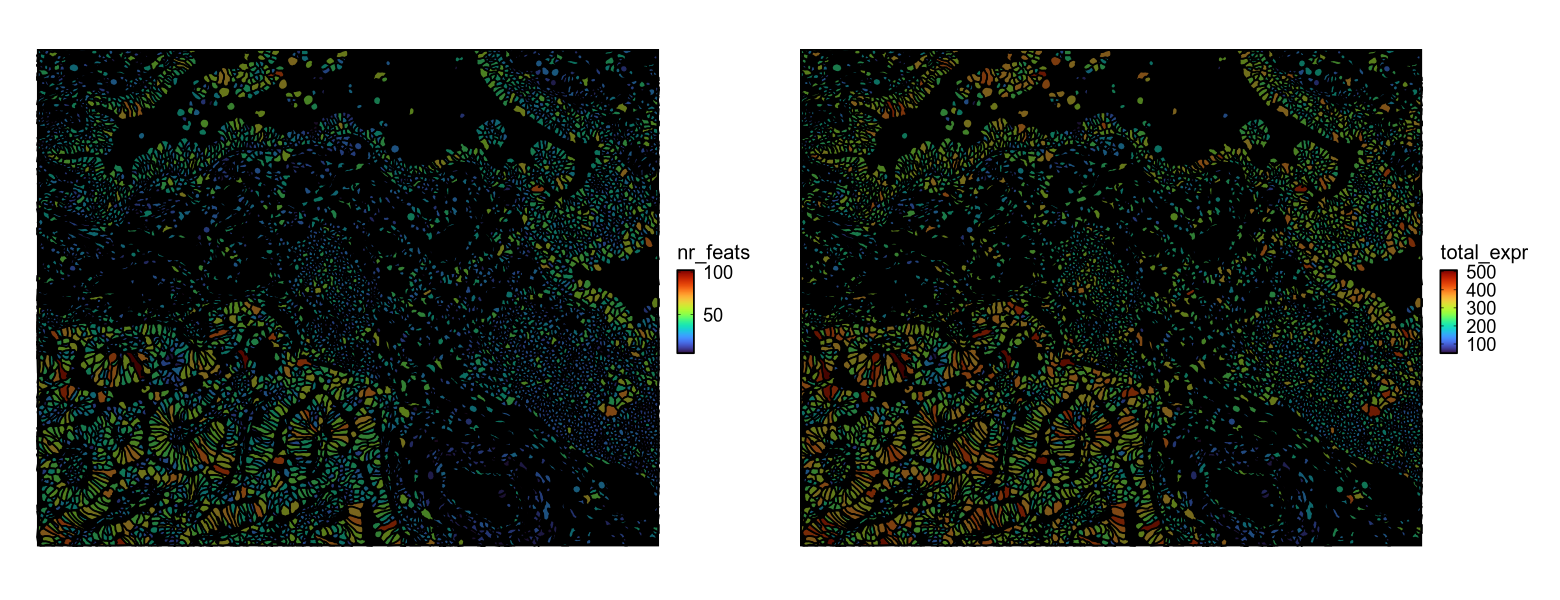

In [9]:
options(repr.plot.width = 13, repr.plot.height = 5)
p1 <- SpatFeaturePlot(
    g,
    image = "black",
    points = FALSE,  # don't show points
    shapes_fill_by = "nr_feats"
)
p2 <- SpatFeaturePlot(
    g,
    image = "black",
    points = FALSE,  # don't show points
    shapes_fill_by = "total_expr"
)
p1 + p2

In [10]:
g <- runPCA(g, feats_to_use = NULL)
g <- runUMAP(g,
    dimensions_to_use = seq(15),
    n_neighbors = 40 # default
)
g <- createNearestNetwork(g,
    dimensions_to_use = seq(15),
    k = 40
)

# takes roughly 1 min to run
g <- doLeidenCluster(g)

Setting dimension reduction [cell][rna] pca



Setting dimension reduction [cell][rna] umap



ℹ Loading scplotter


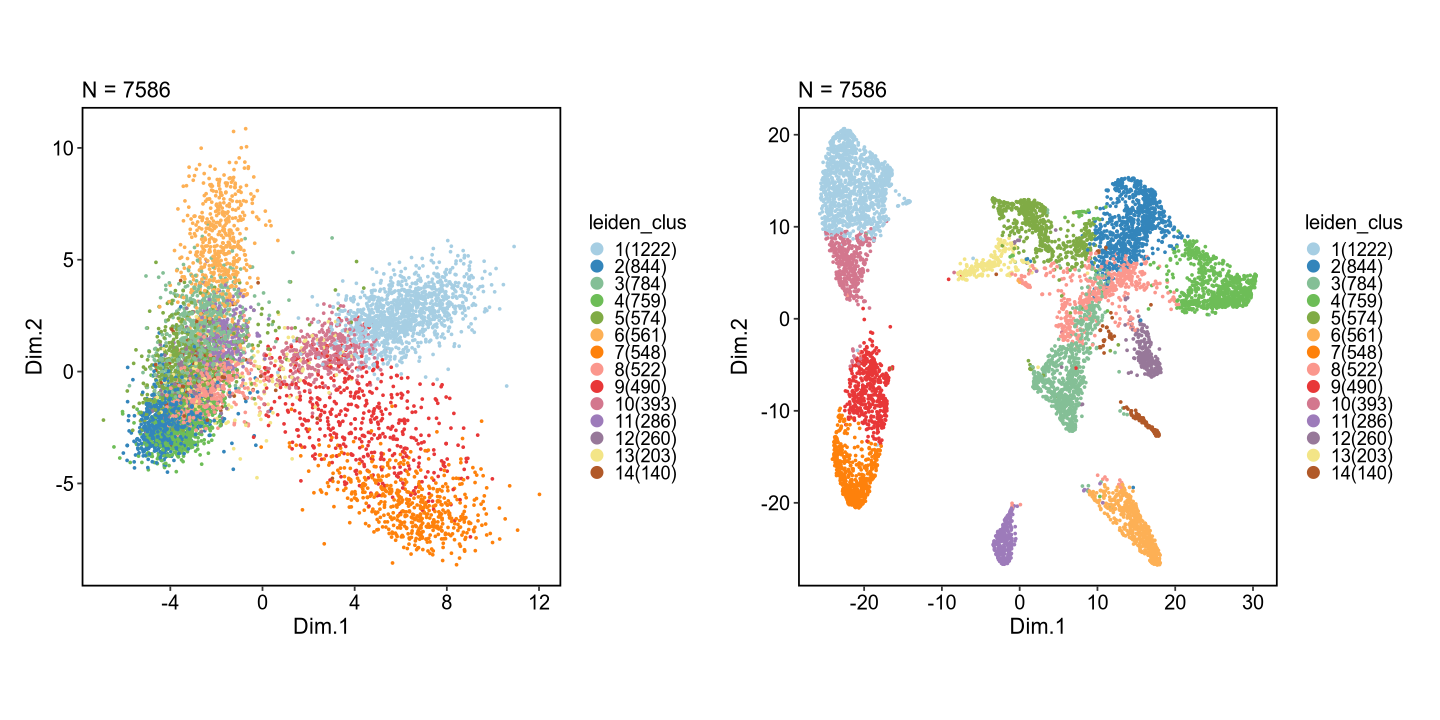

In [25]:
options(repr.plot.width = 12, repr.plot.height = 6)

p1 <- CellDimPlot(g, group_by = "leiden_clus", spat_unit = "cell", reduction = "pca")
p2 <- CellDimPlot(g, group_by = "leiden_clus", spat_unit = "cell", reduction = "umap")

p1 + p2

In [40]:
options(repr.plot.width = 12, repr.plot.height = 9)

FeatureStatPlot(
    g,
    features = c(
        "CD3E", "CD8A", "CD4", # T cell
        "MS4A1", # B
        "SFRP2", # CAF (mesenchymal)
        "RAMP2", # endothelial
        "PROX1", # LEC (lymphatic endothelial cell)
        "CPA3", # mast cell
        "MKI67", # epithelial/cancer
        "PDCD1" # PD1
    ),
    layer = "normalized",
    upper_quantile = 0.9,
    spat_unit = "cell",
    reduction = "umap",
    plot_type = "dim"
)

In [51]:
options(repr.plot.width = 10, repr.plot.height = 5)

p1 <- CellStatPlot(g, spat_unit = "cell", ident = "leiden_clus")
p2 <- CellStatPlot(g, spat_unit = "cell", ident = "leiden_clus", plot_type = "pie")

p1 + p2

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


In [11]:
options(repr.plot.width = 7, repr.plot.height = 6)

g <- setGiotto(g, img_list)
SpatDimPlot(
    g,
    image = "HE",
    points = FALSE,  # don't show points
    shapes_fill_by = "leiden_clus"
)

In [12]:
pvis <- makePseudoVisium(
    extent = ext(g, prefer = c("polygon", "points"), all_data = TRUE),
     # all_data = TRUE is the default
    micron_size = 1
)

g <- setGiotto(g, pvis)
g <- addSpatialCentroidLocations(g, poly_info = "pseudo_visium")
activeSpatUnit(g) <- "pseudo_visium"

g <- calculateOverlap(g,
    spatial_info = "pseudo_visium",
    feat_info = "rna"
)

g <- overlapToMatrix(g)

g <- filterGiotto(g,
    expression_threshold = 1,
    feat_det_in_min_cells = 1,
    min_det_feats_per_cell = 100
)

g <- normalizeGiotto(g)
g <- addStatistics(g)
g <- createSpatialNetwork(g, method = "Delaunay")

Warning message:
“The `micron_size` argument of `makePseudoVisium()` is deprecated as of <NA>
0.4.2.
ℹ Please use the `micron_scale` argument instead.
ℹ The deprecated feature was likely used in the base package.
  Please report the issue to the authors.”
1738 polygons generated

Setting polygon info [pseudo_visium]

Start centroid calculation for polygon information
 layer: pseudo_visium

1. convert polygon to raster

2. overlap raster and points

3. add polygon information

4. add points information

5. create overlap polygon
 information



completed 1: preparation

completed 2: subset expression data

completed 3: subset spatial locations

completed 4: subset cell metadata

completed 5: subset feature metadata

completed 6: subset spatial network(s)

completed 7: subsetted dimension reductions

completed 8: subsetted nearest network(s)

completed 9: subsetted spatial enrichment results

for cell

for nucleus

for pseudo_visium

--> pseudo_visium found back in polygon layer: pseudo_visium

completed 10: subsetted spatial information data

subset feature info: rna

completed 11: subsetted spatial feature data




Feature type:  rna 
Number of cells removed:  1654  out of  1738 
Number of feats removed:  1  out of  377 


first scale feats and then cells

Setting expression [pseudo_visium][rna] normalized

Setting expression [pseudo_visium][rna] scaled

calculating statistics for "normalized" expression

Setting spatial network [pseudo_visium] Delaunay_network



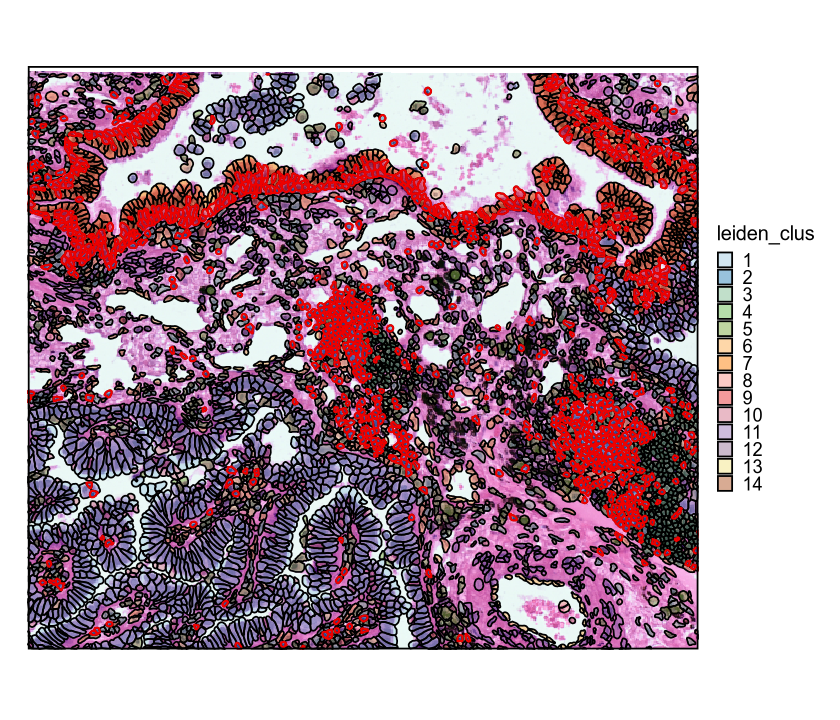

In [13]:
options(repr.plot.width = 7, repr.plot.height = 6)
SpatDimPlot(
    g,
    image = "HE",
    points = FALSE,  # don't show points
    shapes_fill_by = "leiden_clus",
    shapes_highlight = 'leiden_clus %in% c("2", "9")',
    shapes_highlight_color = "red2",
    shapes_highlight_stroke = 0.1
)

In [14]:
options(repr.plot.width = 7, repr.plot.height = 6)
devtools::load_all()
p <- SpatDimPlot(
    g,
    group_by = "leiden_clus",
    graph = "pseudo_visium:Delaunay_network",
    spat_unit = "cell",
    points_raster = FALSE,
    points_size = 0.2,
    points_edge_alpha = 1,
    points_edge_color = "black",
    points_edge_size = 0.5
)
p

ℹ Loading scplotter


In [15]:
options(repr.plot.width = 7, repr.plot.height = 6)
SpatFeaturePlot(
    g,
    image = "HE",
    points = FALSE,  # don't show points
    shapes_fill_by = "total_expr",
    shapes_feat_type = "pseudo_visium"
)

In [16]:
x <- sessionInfo()
x <- capture.output(print(x))
# hide the BLAS/LAPACK paths
x <- x[!startsWith(x, "BLAS/LAPACK:")]
cat(paste(x, collapse = "\n"))

R version 4.4.3 (2025-02-28)
Platform: x86_64-conda-linux-gnu
Running under: Red Hat Enterprise Linux 8.10 (Ootpa)

Matrix products: default

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=C              
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Chicago
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scplotter_0.4.0   Giotto_4.2.1      GiottoClass_0.4.7

loaded via a namespace (and not attached):
  [1] fs_1.6.6                    matrixStats_1.5.0          
  [3] spatstat.sparse_3.1-0       bitops_1.0-9               
  [5] sf_1.0-20                   devtools_2.4.5             
  [7] httr_1.4.7         